In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import re


import nltk as nl
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split


from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB,GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score




In [3]:

f=open("yelp_labelled.txt")
a_y=[]
for l in f:
 l=l.strip("\n \n")
 a_y+=[[l[:-2],int(l[-1])]]
df1=pd.DataFrame(a_y,columns=["x","y"],index=None)
f.close()
f=open("imdb_labelled.txt")
a_y=[]
for l in f:
 l=l.strip("\n \n")
 a_y+=[[l[:-2],int(l[-1])]]
df2=pd.DataFrame(a_y,columns=["x","y"],index=None)
f.close()
f=open("amazon_cells_labelled.txt")
a_y=[]
for l in f:
 l=l.strip("\n \n")
 a_y+=[[l[:-2],int(l[-1])]]
df3=pd.DataFrame(a_y,columns=["x","y"],index=None)
f.close()
df=pd.concat([df1, df2, df3],ignore_index=True)
df

,x,y
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2995,The screen does get smudged easily because it ...,0
2996,What a piece of junk.. I lose more calls on th...,0
2997,Item Does Not Match Picture.,0
2998,The only thing that disappoint me is the infra...,0


In [4]:
nl.download('wordnet')
nl.download('omw-1.4')
nl.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juniu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\juniu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juniu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

In [6]:
def clean_text(text):
    new_text=text.lower()
    clean_text= re.sub("[^a-z]+"," ",new_text)
    clean_text_stop_removed = ""
    for w in clean_text.split(" ")[1:]:
        if not w in stop_words and len(w) > 3:
            clean_text_stop_removed += w
            clean_text_stop_removed += " "
            clean_text_stop_removed=stemmer.stem(clean_text_stop_removed)
    return clean_text_stop_removed

In [7]:
df["text_clean"] = df["x"]
df_clean = df.drop(df.columns[0:1],axis=1)
df_clean['len'] = df_clean['text_clean'].str.len()

In [8]:
x = df_clean['text_clean']
y = df_clean['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=82)

In [9]:
Tfid_vec = TfidfVectorizer()
train_Tfid = Tfid_vec.fit_transform(x_train)
test_Tfid = Tfid_vec.transform(x_test)

==============REPORT==============

BernoulliNB : {'alpha': 1, 'fit_prior': True}
Accuracy: 0.868 	Precision: 0.869 	Recall: 0.868 		F1: 0.868



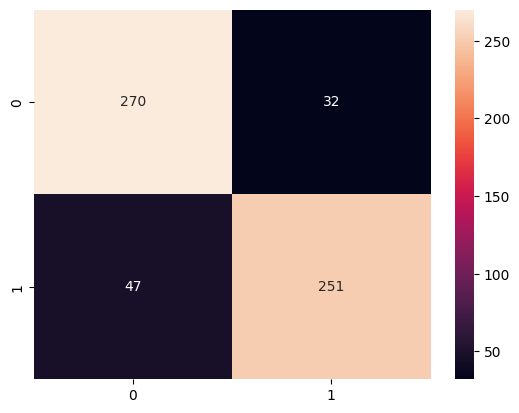

In [10]:
performance_metrics_Tfid = []
print("==============REPORT==============\n")
model = BernoulliNB()
param = { 'alpha': [0.1, 1], 'fit_prior': [True, False] }

gs = GridSearchCV(model, param, cv=10, error_score=2, refit=True)
gs.fit(train_Tfid, y_train)
y_pred = gs.predict(test_Tfid)

accuracy_sc = accuracy_score(y_test, y_pred)
precision_sc= precision_score(y_test, y_pred, average='macro')
recall_sc = recall_score(y_test, y_pred, average='macro')
f1_sc =  f1_score(y_test, y_pred, average='macro')
        
performance_metrics_Tfid.append(["BernoulliNB",accuracy_sc,precision_sc,recall_sc,f1_sc])
print("BernoulliNB", ':', gs.best_params_)
print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_sc, precision_sc, recall_sc, f1_sc))
 

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,  fmt='g')
plt.show()
   
